In [1]:
# !wget ftp://ngs.sanger.ac.uk/production/ag1000g/phase1/AR3/variation/crosses/ar3/hdf5/ag1000g.crosses.phase1.ar3sites.3L.h5
# !wget ftp://ngs.sanger.ac.uk/production/ag1000g/phase1/AR3/variation/crosses/ar3/hdf5/ag1000g.crosses.phase1.ar3sites.2L.h5


--2025-01-30 20:22:45--  ftp://ngs.sanger.ac.uk/production/ag1000g/phase1/AR3/variation/crosses/ar3/hdf5/ag1000g.crosses.phase1.ar3sites.3L.h5
           => ‘ag1000g.crosses.phase1.ar3sites.3L.h5’
193.62.203.221sanger.ac.uk (ngs.sanger.ac.uk)... 
connected. to ngs.sanger.ac.uk (ngs.sanger.ac.uk)|193.62.203.221|:21... 
Logging in as anonymous ... Logged in!
done.    ==> PWD ... done.
done.  ==> CWD (1) /production/ag1000g/phase1/AR3/variation/crosses/ar3/hdf5 ... done.
6699473207g1000g.crosses.phase1.ar3sites.3L.h5 ... 
done.    ==> RETR ag1000g.crosses.phase1.ar3sites.3L.h5 ... done.
Length: 6699473207 (6.2G) (unauthoritative)

ag1000g.crosses.pha 100%[===================>]   6.24G  21.6MB/s    in 5m 18s  

2025-01-30 20:28:06 (20.1 MB/s) - ‘ag1000g.crosses.phase1.ar3sites.3L.h5’ saved [6699473207]

--2025-01-30 20:28:06--  ftp://ngs.sanger.ac.uk/production/ag1000g/phase1/AR3/variation/crosses/ar3/hdf5/ag1000g.crosses.phase1.ar3sites.2L.h5
           => ‘ag1000g.crosses.phase1.ar3sites

In [1]:
import pickle
import gzip
import random
import numpy as np
import h5py
import pandas as pd
from collections import defaultdict
import matplotlib.pylab as plt
from pandas.plotting import scatter_matrix

/home/veysel/.local/lib/python3.12/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [3]:
samples = pd.read_csv('samples.tsv', sep='\t')
print(len(samples))
samples.head()

80


,id,cross,sex,function
0,AD0231-C,cross-29-2,F,parent
1,AD0232-C,cross-29-2,M,parent
2,AD0234-C,cross-29-2,F,progeny
3,AD0235-C,cross-29-2,F,progeny
4,AD0236-C,cross-29-2,F,progeny


In [6]:
print(samples['cross'].unique())

['cross-29-2' 'cross-36-9' 'cross-42-4' 'cross-46-9']


In [5]:
print(samples[samples['cross']=='cross-29-2'][['id', 'function']])

          id function
0   AD0231-C   parent
1   AD0232-C   parent
2   AD0234-C  progeny
3   AD0235-C  progeny
4   AD0236-C  progeny
5   AD0237-C  progeny
6   AD0238-C  progeny
7   AD0239-C  progeny
8   AD0240-C  progeny
9   AD0241-C  progeny
10  AD0242-C  progeny
11  AD0243-C  progeny
12  AD0244-C  progeny
13  AD0245-C  progeny
14  AD0246-C  progeny
15  AD0247-C  progeny
16  AD0248-C  progeny
17  AD0249-C  progeny
18  AD0250-C  progeny
19  AD0251-C  progeny
20  AD0252-C  progeny
21  AD0253-C  progeny


In [7]:
print(len(samples[samples['cross']=='cross-29-2']))

22


In [8]:
print(samples[samples['function']=='parent'])

          id       cross sex function
0   AD0231-C  cross-29-2   F   parent
1   AD0232-C  cross-29-2   M   parent
22  AD0254-C  cross-36-9   F   parent
23  AD0255-C  cross-36-9   M   parent
41  AD0305-C  cross-42-4   F   parent
42  AD0306-C  cross-42-4   M   parent
57  AD0347-C  cross-46-9   F   parent
58  AD0348-C  cross-46-9   M   parent


# **1. Understanding HDF5 and h5py**
## **1.1 What is HDF5?**

HDF5 (Hierarchical Data Format version 5) is a file format and data model designed to store and organize large amounts of data. It is widely used in scientific computing for its ability to handle complex data structures and efficiently manage large datasets.

Key Features of HDF5:

    Hierarchical Structure: Similar to a filesystem with folders and files, HDF5 organizes data into groups and datasets.
        Groups: Analogous to directories or folders. They can contain other groups or datasets.
        Datasets: Containers for actual data, similar to files containing data.
    Scalability: Efficiently stores very large datasets.
    Flexibility: Supports various data types and complex data relationships.
    Portability: HDF5 files are platform-independent and can be read/written on different operating systems.

Use Cases:

    Storing large-scale scientific data (e.g., genomics, astronomy, climate data).
    Managing complex datasets with multiple related components.
    Facilitating data sharing and interoperability between different software tools.

In [15]:
h5_3L = h5py.File('ag1000g.crosses.phase1.ar3sites.3L.h5', 'r')
"""
Purpose: Retrieves the list of sample names from the HDF5 file and 
decodes them from bytes to strings.
Breakdown:
h5_3L['/3L/samples']:
Accesses the dataset located at the path '/3L/samples' within the HDF5 file.
Groups in HDF5: The /3L denotes a group named '3L', and 'samples' is a dataset 
within that group. Dataset Content: Presumably, this dataset contains sample 
identifiers (e.g., individual names or IDs).
samples_hdf5: A list of sample names, e.g., ['Sample1', 'Sample2', ..., 'SampleN'].
Example: Suppose h5_3L['/3L/samples'] contains [b'Sample1', b'Sample2', b'Sample3'].
After decoding:
samples_hdf5 = ['Sample1', 'Sample2', 'Sample3']
Access Method:
h5_3L['/path/to/dataset']:
Retrieves the dataset at the specified path within the HDF5 file.
Returns an h5py.Dataset object, which can be treated similarly to a NumPy array.
Each h5py.Dataset behaves like a NumPy array. You can perform array operations, indexing, slicing, etc.
"""
samples_hdf5 = list(map(lambda sample: sample.decode('utf-8'), h5_3L['/3L/samples']))
calldata_genotype = h5_3L['/3L/calldata/genotype']
MQ0 = h5_3L['/3L/variants/MQ0']
MQ = h5_3L['/3L/variants/MQ']
QD = h5_3L['/3L/variants/QD']
Coverage = h5_3L['/3L/variants/Coverage']
CoverageMQ0 = h5_3L['/3L/variants/CoverageMQ0']
HaplotypeScore = h5_3L['/3L/variants/HaplotypeScore']
QUAL = h5_3L['/3L/variants/QUAL']
FS = h5_3L['/3L/variants/FS']
DP = h5_3L['/3L/variants/DP']
HRun = h5_3L['/3L/variants/HRun']
ReadPosRankSum = h5_3L['/3L/variants/ReadPosRankSum']
my_features = {
    'MQ': MQ,
    'QD': QD,
    'Coverage': Coverage,
    'HaplotypeScore': HaplotypeScore,
    'QUAL': QUAL,
    'FS': FS,
    'DP': DP,
    'HRun': HRun,
    'ReadPosRankSum': ReadPosRankSum
}
num_features = len(my_features)
num_alleles = h5_3L['/3L/variants/num_alleles']
is_snp = h5_3L['/3L/variants/is_snp']
POS = h5_3L['/3L/variants/POS']

In [44]:
print(calldata_genotype[1000110:1000115,:,:], calldata_genotype.shape)
step = 0
for i, genotype in enumerate(calldata_genotype):
    print(i, genotype, genotype.shape, np.where(genotype == -1), len(np.where(genotype == -1)[0]))
    step +=1
    if step > 4:
        break

[[[0 0]
  [0 0]
  [0 0]
  [0 0]
  [0 0]
  [0 0]
  [0 0]
  [0 0]
  [0 0]
  [0 0]
  [0 0]
  [0 0]
  [0 0]
  [0 0]
  [0 0]
  [0 0]
  [0 0]
  [0 0]
  [0 0]
  [0 0]
  [0 0]
  [0 0]
  [0 0]
  [0 1]
  [0 0]
  [0 1]
  [0 0]
  [0 0]
  [0 0]
  [0 0]
  [0 0]
  [0 1]
  [0 1]
  [0 0]
  [0 0]
  [0 0]
  [0 1]
  [0 1]
  [0 0]
  [0 0]
  [0 0]
  [0 1]
  [0 0]
  [0 0]
  [0 1]
  [0 0]
  [0 1]
  [0 0]
  [0 0]
  [0 0]
  [0 0]
  [0 0]
  [0 0]
  [0 1]
  [0 0]
  [0 0]
  [0 0]
  [0 0]
  [0 1]
  [0 0]
  [0 1]
  [0 1]
  [0 0]
  [0 1]
  [0 1]
  [0 0]
  [0 1]
  [0 0]
  [0 0]
  [0 1]
  [0 0]
  [0 0]
  [0 1]
  [0 1]
  [0 0]
  [0 0]
  [0 1]
  [0 0]
  [0 0]
  [0 1]]

 [[0 0]
  [0 0]
  [0 0]
  [0 0]
  [0 0]
  [0 0]
  [0 0]
  [0 0]
  [0 0]
  [0 0]
  [0 0]
  [0 0]
  [0 0]
  [0 0]
  [0 0]
  [0 0]
  [0 0]
  [0 0]
  [0 0]
  [0 0]
  [0 0]
  [0 0]
  [0 0]
  [0 0]
  [0 0]
  [0 0]
  [0 0]
  [0 0]
  [0 0]
  [0 0]
  [0 0]
  [0 0]
  [0 0]
  [0 0]
  [0 0]
  [0 0]
  [0 0]
  [0 0]
  [0 0]
  [0 0]
  [0 0]
  [0 0]
  [0 0]
  [0 0]
  [0 0

In [41]:
print(calldata_genotype[13214][2], set(calldata_genotype[13214][2]))

[0 0] {np.int8(0)}


In [16]:
for i in my_features.keys():
    print(my_features[i])

<HDF5 dataset "MQ": shape (16437135,), type "<f2">
<HDF5 dataset "QD": shape (16437135,), type "<f2">
<HDF5 dataset "Coverage": shape (16437135,), type "<i4">
<HDF5 dataset "HaplotypeScore": shape (16437135,), type "<f2">
<HDF5 dataset "QUAL": shape (16437135,), type "<f4">
<HDF5 dataset "FS": shape (16437135,), type "<f2">
<HDF5 dataset "DP": shape (16437135,), type "<i4">
<HDF5 dataset "HRun": shape (16437135,), type "|u1">
<HDF5 dataset "ReadPosRankSum": shape (16437135,), type "<f2">


In [17]:
for i in my_features.keys():
    print(my_features[i][:5])

[0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0.]
[4 8 8 9 9]
[0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0.]
[1 1 1 1 1]
[2 0 0 2 7]
[0. 0. 0. 0. 0.]


In [48]:
for i in my_features.keys():
    print(len(my_features[i]))

16437135
16437135
16437135
16437135
16437135
16437135
16437135
16437135
16437135


In [46]:
#compute mendelian errors (biallelic)
def compute_mendelian_errors(mother, father, offspring):
    """
    inputs is are set datatype. There are 80 samples in total and millions of variants. 
    each variant is stored as [val1, val2]. these variants are sent here by set function.
    if val1=val2 set([val1,val2]) = {val1}
    """
    num_errors = 0
    num_ofs_problems = 0
    if len(mother.union(father)) == 1:
        # Mother and father are homogenous and the same for ofs in offspring
        for ofs in offspring:
            if len(ofs) == 2:
                # Offspring is het
                num_errors += 1
                num_ofs_problems += 1
            elif len(ofs.intersection(mother)) == 0:
                # Offspring is homo, but opposite from parents
                num_errors += 2
                num_ofs_problems += 1
    elif len(mother) == 1 and len(father) == 1:
        # Mother and father are homo and different for ofs in offspring
        for ofs in offspring:
            if len(ofs) == 1:
                # Homo, should be het
                num_errors += 1
                num_ofs_problems += 1
    elif len(mother) == 2 and len(father) == 2:
        # Both are het, individual offspring can be anything
        pass
    else:
        # One is het, the other is homo
        homo = mother if len(mother) == 1 else father
        for ofs in offspring:
            if len(ofs) ==1 and not ofs.intersection(homo):
                # homo, but not including the allele from parent that is homo
                num_errors += 1
                num_ofs_problems += 1
    return num_errors, num_ofs_problems # return tuple of number of errors and number of offspring
            

In [47]:
def acceptable_position_to_genotype():
    for i, genotype in enumerate(calldata_genotype):
        if is_snp[i] and num_alleles[i] == 2: # checks it is snp and Ensures the variant is biallelic
            if len(np.where(genotype == -1)[0]) > 1: # len(...) > 1: If more than one sample has missing genotype data for this variant, it's considered unreliable.
                # Missing data
                continue
            yield i

def acumulate(fun):
    """
    To aggregate results from a generator function (fun) into a dictionary (acumulator). 
    The generator is expected to yield tuples where the first element can serve 
    as a key and the second as a value. Parameters:
    fun: A generator function that yields tuples, typically in the form (key, value).
    the first one is position and the second one is return from compute_mendelian_errors
    input is basically an integer and a tuple.
    """
    acumulator = {}
    for res in fun():
        if res is not None:
            acumulator[res[0]] = res[1] # Uses the first element of the tuple as the key and the second as the value in the dictionary.
    return acumulator # acumulator = {pos: (num_errors, num_ofs_problems)}

def get_family_indexes(samples_hdf5, cross_pd):
    """
    To identify and retrieve the indices of the mother, father, and offspring 
    within the samples_hdf5 list based on information provided in a 
    pandas DataFrame (cross_pd). Parameters:
    samples_hdf5: A list of sample identifiers (strings) from the HDF5 file.
    cross_pd: A pandas DataFrame containing information about individuals in the family, 
    including their IDs, roles (parent or offspring), and sex.
    """
    offspring = []
    for i, individual in cross_pd.T.items():
        index = samples_hdf5.index(individual.id)
        if individual.function == 'parent':
            if individual.sex == 'M':
                father = index
            else:
                mother = index
        else:
            offspring.append(index)
    return {'mother': mother, 'father': father, 'offspring': offspring}

In [ ]:
cross_pd = samples[samples['cross'] == 'cross-29-2']
"""
family_indexes = {
    'mother': 0,
    'father': 1,
    'offspring': [2, 3, 4]
}
"""
family_indexes = get_family_indexes(samples_hdf5, cross_pd)
mother_index = family_indexes['mother']
father_index = family_indexes['father']
offspring_indexes = family_indexes['offspring']
all_errors = {}

def get_mendelian_errors():
    """
    To iterate over all acceptable variant positions (biallelic SNPs without 
    excessive missing data) and compute Mendelian errors for each, yielding 
    the genomic position and corresponding error counts.
    """
    for i in acceptable_position_to_genotype():
        genotype = calldata_genotype[i]
        mother = set(genotype[mother_index])
        father = set(genotype[father_index])
        offspring = [set(genotype[ofs_index]) for ofs_index in offspring_indexes]
        my_mendelian_errors = compute_mendelian_errors(mother, father, offspring)
        yield POS[i], my_mendelian_errors # mendelian errors is a tuple

mendelian_errors = acumulate(get_mendelian_errors) #{pos: (num_errors, num_ofs_problems)}


In [19]:
pickle.dump(mendelian_errors, gzip.open('mendelian_errors.pickle.gz', 'wb'))


In [45]:
ordered_positions = sorted(mendelian_errors.keys())
ordered_features = sorted(my_features.keys())
num_features = len(ordered_features)
feature_fit = np.empty((len(ordered_positions), len(my_features) + 2), dtype=float)
for column, feature in enumerate(ordered_features): # 'Strange' order
    """
    Populate the feature_fit matrix with feature values corresponding to each genomic position.
    """
    print(feature)
    current_hdf_row = 0
    for row, genomic_position in enumerate(ordered_positions):
        while POS[current_hdf_row] < genomic_position:
            current_hdf_row += 1
        feature_fit[row, column] = my_features[feature][current_hdf_row]
for row, genomic_position in enumerate(ordered_positions):
    feature_fit[row, num_features] = genomic_position
    feature_fit[row, num_features + 1] = 1 if mendelian_errors[genomic_position][0] > 0 else 0

np.save(gzip.open('feature_fit.npy.gz', 'wb'), feature_fit, allow_pickle=False, fix_imports=False)
pickle.dump(ordered_features, open('ordered_features', 'wb'))

NameError: name 'mendelian_errors' is not defined

In [5]:
h5_2L = h5py.File('ag1000g.crosses.phase1.ar3sites.2L.h5', 'r')
samples_hdf5 = list(map(lambda sample: sample.decode('utf-8'), h5_2L['/2L/samples']))
calldata_DP = h5_2L['/2L/calldata/DP']
POS = h5_2L['/2L/variants/POS']


# +
def get_parent_indexes(samples_hdf5, parents_pd):
    """
    The helper function get_parent_indexes iterates over the transposed DataFrame 
    of samples whose function is 'parent' and returns their indexes from samples_hdf5.
    The DataFrame parents_pd is created by filtering the samples DataFrame for parents, 
    and the resulting parent_indexes list holds the indexes of the parent samples.
    From metadata samples I got the ID, from samples_hdf5, I got the indexes which are relevant 
    for other data features. For example, for ID AD0231-C, samples_hdf5 has index and this index 
    is same for PD, MQ0 etc..
    """
    parents = []
    for i, individual in parents_pd.T.items():
        index = samples_hdf5.index(individual.id)
        parents.append(index)
    return parents

parents_pd = samples[samples['function'] == 'parent']
parent_indexes = get_parent_indexes(samples_hdf5, parents_pd)
# -

all_dps = []
for i, pos in enumerate(POS):
    if random.random() > 0.01:
        continue
    pos_dp = calldata_DP[i]
    parent_pos_dp = [pos_dp[parent_index] for parent_index in parent_indexes]
    all_dps.append(parent_pos_dp + [pos])
all_dps = np.array(all_dps)
np.save(gzip.open('DP_2L.npy.gz', 'wb'), all_dps, allow_pickle=False, fix_imports=False)



/tmp/ipykernel_9077/2062506365.py:27: DeprecationWarning: The 'fix_imports' flag is deprecated and has no effect. (Deprecated in NumPy 2.1)
  np.save(gzip.open('DP_2L.npy.gz', 'wb'), all_dps, allow_pickle=False, fix_imports=False)


In [9]:
print(len(samples_hdf5), type(samples_hdf5))

80 <class 'list'>


In [7]:
samples.head()

,id,cross,sex,function
0,AD0231-C,cross-29-2,F,parent
1,AD0232-C,cross-29-2,M,parent
2,AD0234-C,cross-29-2,F,progeny
3,AD0235-C,cross-29-2,F,progeny
4,AD0236-C,cross-29-2,F,progeny


0


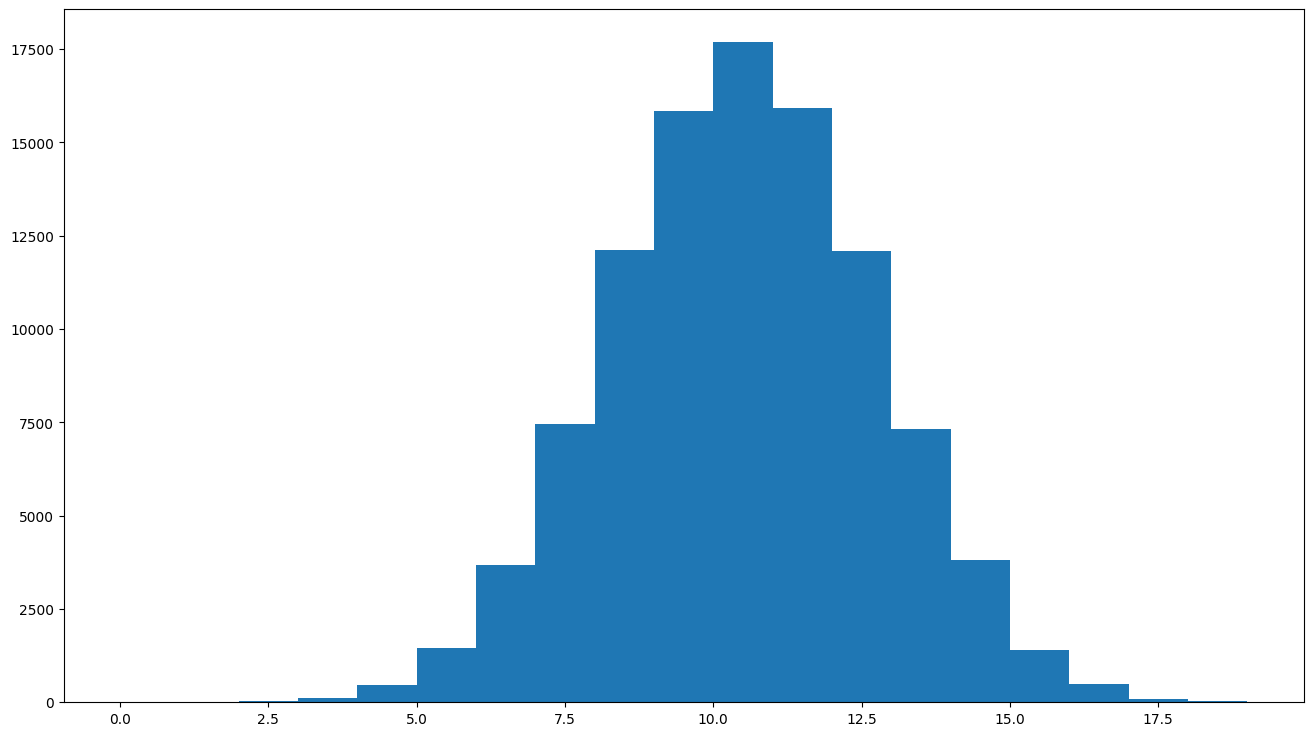

In [10]:
# Mendelian simulations
"""
I simulate 20 offspring and tally heterozygous counts in num_hets_AA_AT. 
Then, I create a histogram with matplotlib, tweaking bins to ensure it 
captures counts up to 20.
Each simulation represents a scenario where, for each of 20 offspring, 
I randomly decide (with equal probability) whether an offspring shows a 
“1” (e.g., a heterozygous genotype) or “0” (e.g., a homozygous genotype). 
The code counts how many offspring have a “1” in each simulation.
"""
num_sims = 100000
num_ofs = 20

num_hets_AA_AT = []
for sim in range(num_sims):
    sim_hets = 0
    for ofs in range(num_ofs):
        sim_hets += 1 if random.choice([0, 1]) == 1 else 0
    num_hets_AA_AT.append(sim_hets)
    
fig, ax = plt.subplots(1,1, figsize=(16,9))
ax.hist(num_hets_AA_AT, bins=range(20))
print(len([num_hets for num_hets in num_hets_AA_AT if num_hets==20]))


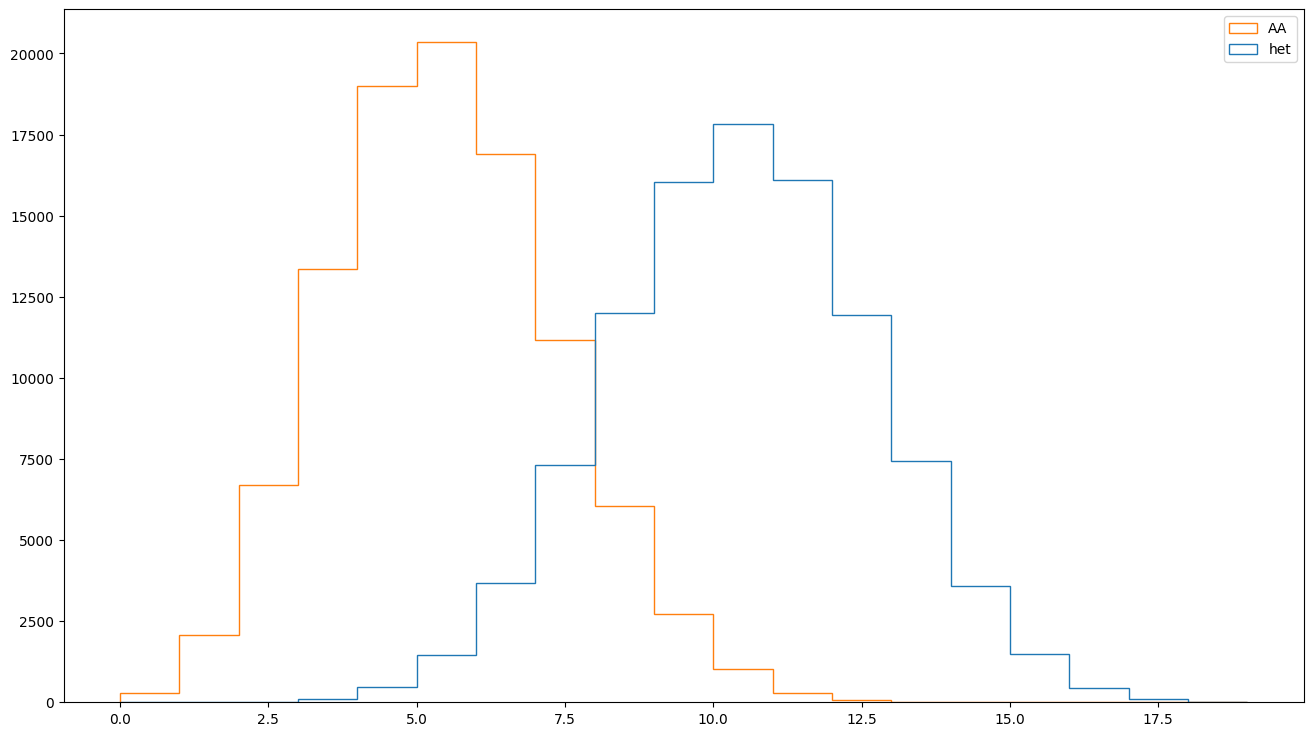

In [12]:
"""
I’m piecing together Mendelian inheritance by simulating two traits, 
counting offspring with specific trait combinations, and visualizing 
results with a histogram. This approach provides insights into genetic patterns.
Analyzing the distribution of traits in offspring involves counting each trait 
combination, excluding homozygous derived traits, and visualizing the results 
with step histograms for clear representation.
derived_cnt == 0: Both alleles are 0 (homozygous reference, "AA").
derived_cnt == 1: One allele is 0 and one is 1 (heterozygous, "AT").
derived_cnt == 2: Both alleles are 1 (homozygous derived, "TT")—this case isn’t counted.
"""
num_AAs_AT_AT = []
num_hets_AT_AT = []
for sim in range(num_sims):
    sim_AAs = 0
    sim_hets = 0
    for ofs in range(num_ofs):
        derived_cnt = sum(random.choices([0, 1], k=2)) # return k sized list
        sim_AAs += 1 if derived_cnt == 0 else 0
        sim_hets += 1 if derived_cnt == 1 else 0
    num_AAs_AT_AT.append(sim_AAs)
    num_hets_AT_AT.append(sim_hets)
fig, ax = plt.subplots(1,1, figsize=(16,9))
ax.hist([num_hets_AT_AT, num_AAs_AT_AT], histtype='step', fill=False, bins=range(20), label=['het', 'AA'])
plt.legend()

In [13]:
mendelian_errors = pickle.load(gzip.open('mendelian_errors.pickle.gz', 'rb')) #{pos: (num_errors, num_ofs_problems)}
feature_fit = np.load(gzip.open('feature_fit.npy.gz', 'rb')) # numpy array ncols: len of erroneous genomic position, num of cols: len of my features +2
ordered_features = np.load(open('ordered_features', 'rb'), allow_pickle=True) # my_features just sorted
num_features = len(ordered_features)

len(mendelian_errors), len(list(filter(lambda x: x[0] > 0, mendelian_errors.values())))

total_observations = len(mendelian_errors)
error_observations = len(list(filter(lambda x: x[0] > 0, mendelian_errors.values()))) # value is (num_errors, num_ofs_problems). if it is greater than 0 that means error observation
ok_observations = total_observations - error_observations
fraction_errors = error_observations/total_observations
print (total_observations, ok_observations, error_observations, 100*fraction_errors)
del mendelian_errors

# +
prob_ok_choice = error_observations / ok_observations

def accept_entry(row):
    if row[-1] == 1:
        return True
    return random.random() <= prob_ok_choice

accept_entry_v = np.vectorize(accept_entry, signature='(i)->()') #The signature '(i)->()' indicates that the function accepts a one-dimensional array (a row) and returns a scalar (a boolean).

accepted_entries = accept_entry_v(feature_fit)
balanced_fit = feature_fit[accepted_entries]
del feature_fit
balanced_fit.shape
len([x for x in balanced_fit if x[-1] == 1]), len([x for x in balanced_fit if x[-1] == 0])
# -

np.save(gzip.open('balanced_fit.npy.gz', 'wb'), balanced_fit, allow_pickle=False, fix_imports=False)



10905732 10729628 176104 1.614783858616735


/tmp/ipykernel_9077/70274478.py:32: DeprecationWarning: The 'fix_imports' flag is deprecated and has no effect. (Deprecated in NumPy 2.1)
  np.save(gzip.open('balanced_fit.npy.gz', 'wb'), balanced_fit, allow_pickle=False, fix_imports=False)


/tmp/ipykernel_9077/1311462988.py:9: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  _ = fit_df.hist(column=ordered_features, ax=ax)


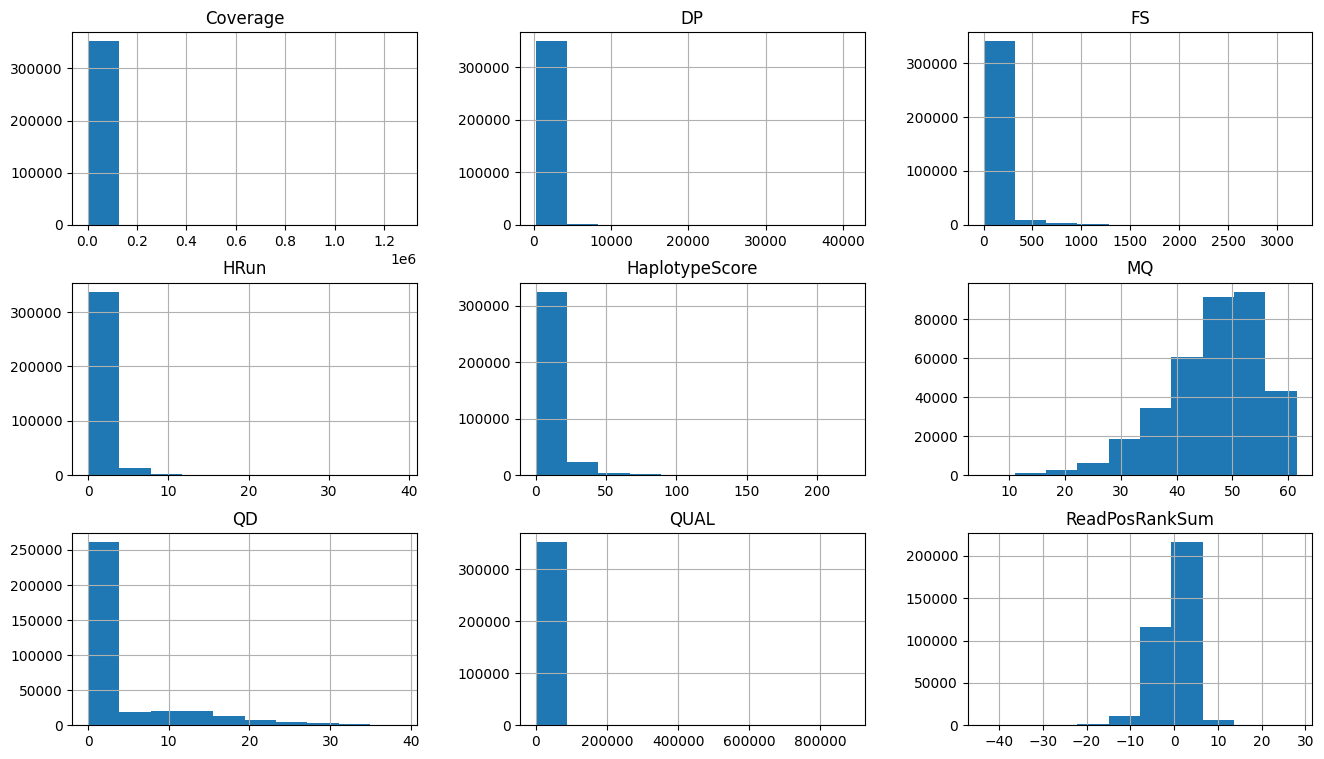

In [50]:
fit = np.load(gzip.open('balanced_fit.npy.gz', 'rb'))
ordered_features = np.load(open('ordered_features', 'rb'), allow_pickle=True)
num_features = len(ordered_features)
fit_df = pd.DataFrame(fit, columns=ordered_features + ['pos', 'error'])
num_samples = 80
del fit

fig,ax = plt.subplots(figsize=(16,9))
_ = fit_df.hist(column=ordered_features, ax=ax)

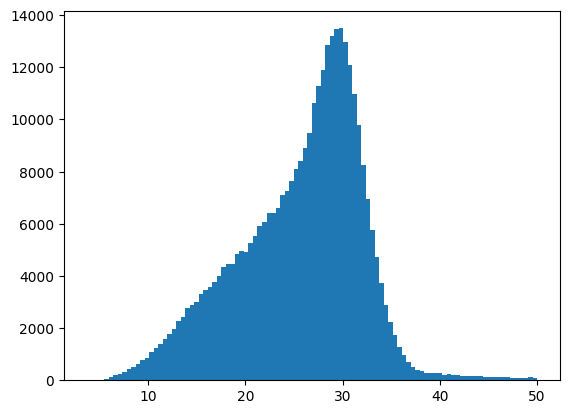

In [51]:
fit_df['MeanDP'] = fit_df['DP'] / num_samples
fig, ax = plt.subplots()
_ = ax.hist(fit_df[fit_df['MeanDP']<50]['MeanDP'], bins=100)

In [52]:
errors_df = fit_df[fit_df['error'] == 1]
ok_df = fit_df[fit_df['error'] == 0]

ok_qual_above_df = ok_df[ok_df['QUAL']>0.005]
errors_qual_above_df = errors_df[errors_df['QUAL']>0.005]
print(ok_df.size, errors_df.size, ok_qual_above_df.size, errors_qual_above_df.size)
print(ok_qual_above_df.size / ok_df.size, errors_qual_above_df.size / errors_df.size)

ok_qd_above_df = ok_df[ok_df['QD']>0.05]
errors_qd_above_df = errors_df[errors_df['QD']>0.05]
print(ok_df.size, errors_df.size, ok_qd_above_df.size, errors_qd_above_df.size)
print(ok_qd_above_df.size / ok_df.size, errors_qd_above_df.size / errors_df.size)

2113464 2113248 221784 1761276
0.10493862209150476 0.8334450097669559
2113464 2113248 213468 1463856
0.1010038496042516 0.692704311088902


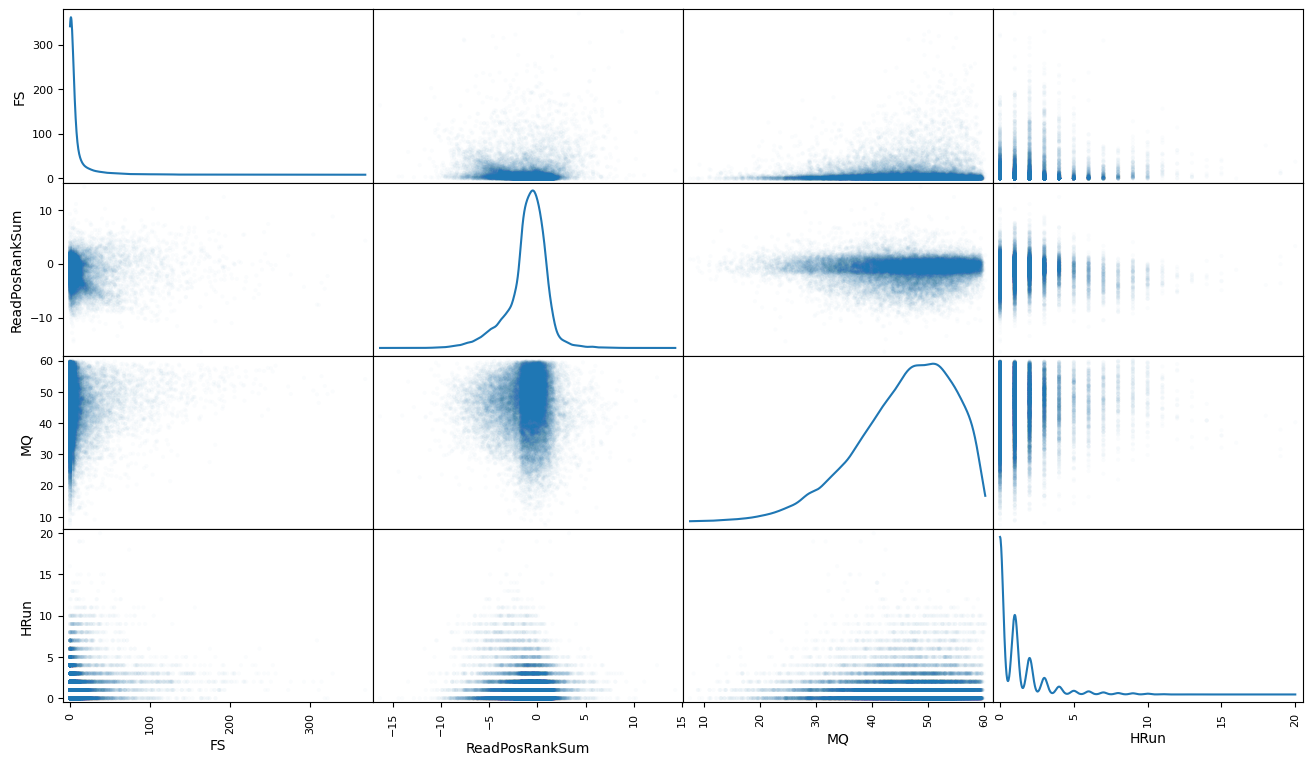

In [53]:
not_bad_area_errors_df = errors_df[(errors_df['QUAL']<0.005)&(errors_df['QD']<0.05)]
_ = scatter_matrix(not_bad_area_errors_df[['FS', 'ReadPosRankSum', 'MQ', 'HRun']], diagonal='kde', figsize=(16, 9), alpha=0.02)


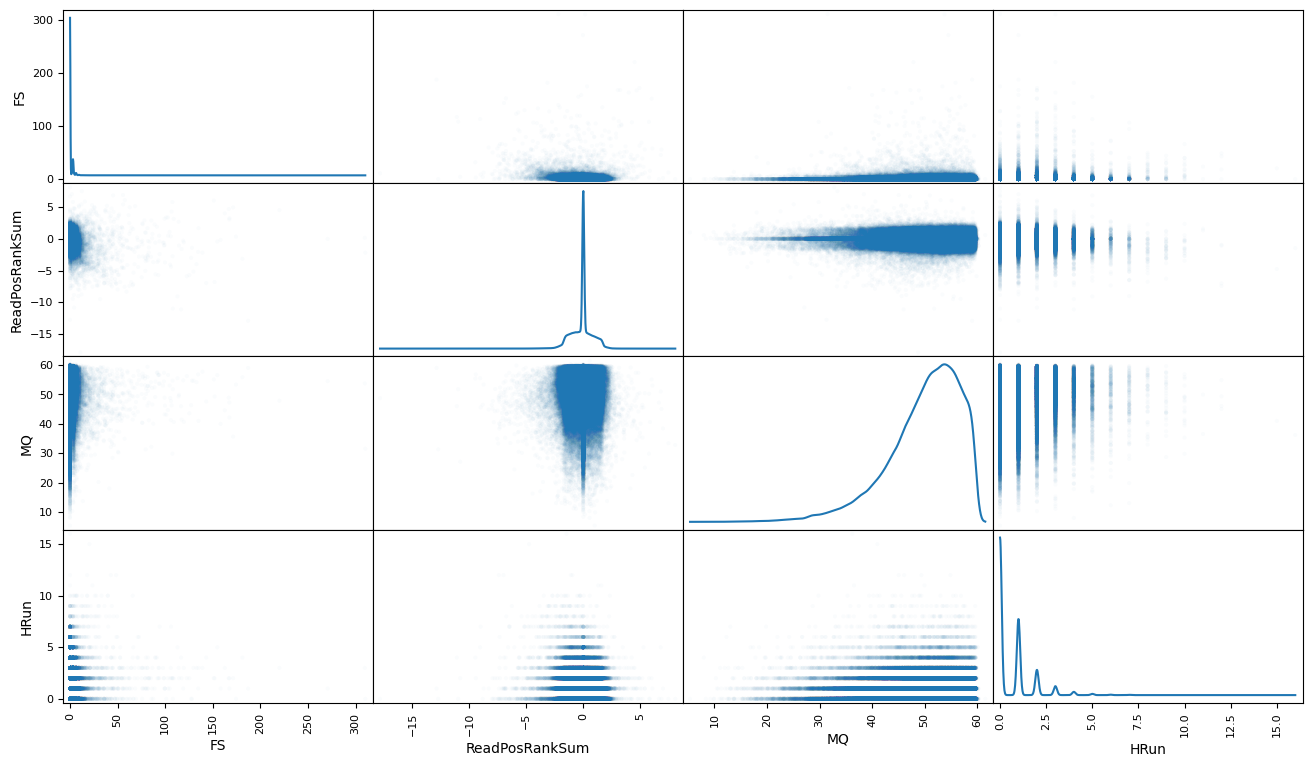

In [54]:
not_bad_area_ok_df = ok_df[(ok_df['QUAL']<0.005)&(ok_df['QD']<0.05)]
_ = scatter_matrix(not_bad_area_ok_df[['FS', 'ReadPosRankSum', 'MQ', 'HRun']], diagonal='kde', figsize=(16, 9), alpha=0.02)


In [55]:
all_fit_df = pd.DataFrame(np.load(gzip.open('feature_fit.npy.gz', 'rb')), columns=ordered_features + ['pos', 'error'])
potentially_good_corner_df = all_fit_df[(all_fit_df['QUAL']<0.005)&(all_fit_df['QD']<0.05)]
all_errors_df=all_fit_df[all_fit_df['error'] == 1]
print(len(all_fit_df), len(all_errors_df), len(all_errors_df) / len(all_fit_df))

potentially_good_corner_errors_df = potentially_good_corner_df[potentially_good_corner_df['error'] == 1]
print(len(potentially_good_corner_df), len(potentially_good_corner_errors_df), len(potentially_good_corner_errors_df) / len(potentially_good_corner_df))
print(len(potentially_good_corner_df)/len(all_fit_df))


10905732 176104 0.01614783858616735
9625754 29331 0.003047137917715329
0.8826325458942141


(194307, 9)
17.0 14.0
23.0 22.0
31.0 29.0
28.0 24.0
32.0 27.0
31.0 31.0
25.0 24.0
24.0 20.0


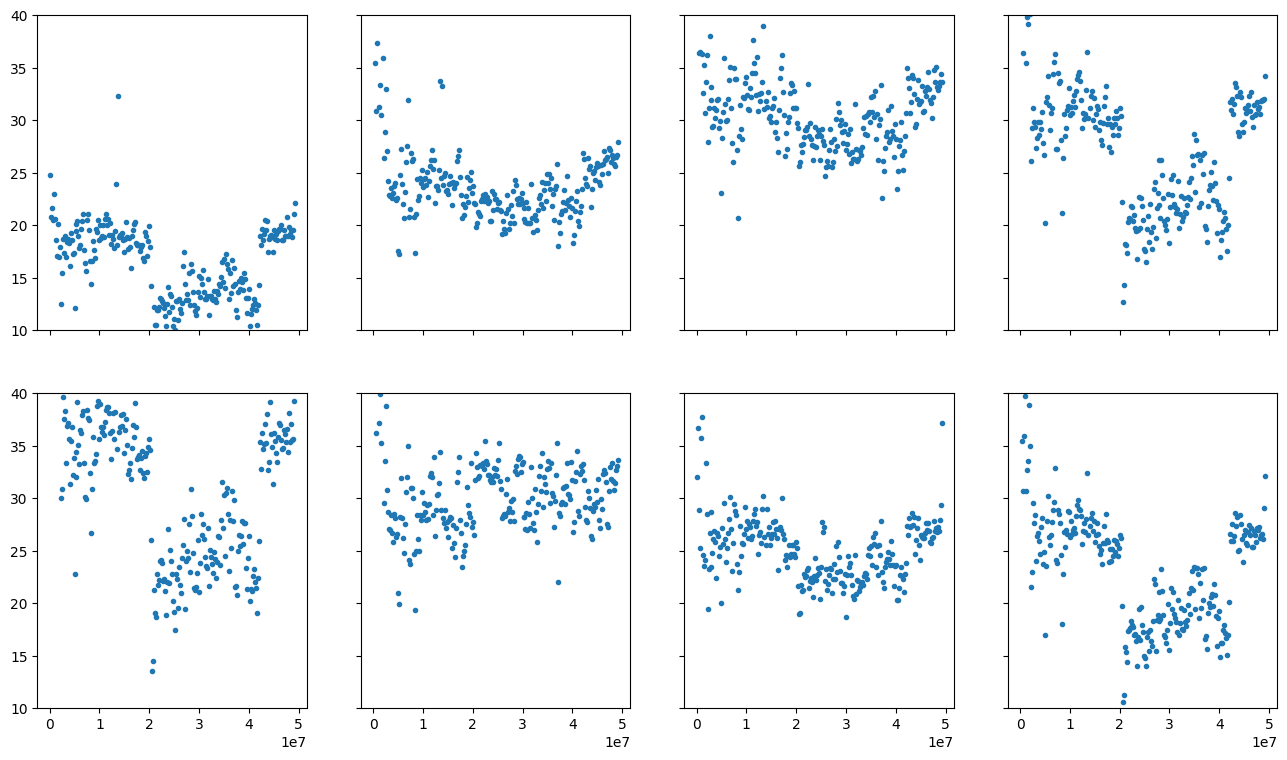

In [57]:
num_parents = 8
dp_2L = np.load(gzip.open('DP_2L.npy.gz', 'rb'))
print(dp_2L.shape)

for i in range(num_parents):
    print(np.median(dp_2L[:,i]), np.median(dp_2L[50000:150000,i]))

window_size = 200000
parent_DP_windows = [defaultdict(list) for i in range(num_parents)]


# +
def insert_in_window(row):
    for parent in range(num_parents):
        parent_DP_windows[parent][row[-1] // window_size].append(row[parent])

insert_in_window_v = np.vectorize(insert_in_window, signature='(n)->()')
_ = insert_in_window_v(dp_2L)
# -

fig, axs = plt.subplots(2, num_parents // 2, figsize=(16, 9), sharex=True, sharey=True, squeeze=True)
for parent in range(num_parents):
    ax = axs[parent // 4][parent % 4]
    parent_data = parent_DP_windows[parent]
    ax.set_ylim(10, 40)
    ax.plot(*zip(*[(win*window_size, np.mean(lst)) for win, lst in parent_data.items()]), '.')
